## Basic profiling
Basic requirements: conda install line_profiler
https://ipython-books.github.io/43-profiling-your-code-line-by-line-with-line_profiler/

## color profiling
Basic requirements: pip install py-heat-magic
https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5

get the code from https://github.com/csurfer/pyheatmagic



## cprofile


In [3]:
import numpy as np
%load_ext line_profiler

In [4]:
def prof_function():
    x=10*20
    y=10+x
    return (y)

In [5]:
%%writefile simulation.py
import numpy as np

def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape)<.5) - 1

def simulate(iterations, n=10000):
    s = step(iterations, n)
    x = np.cumsum(s, axis=0)
    bins = np.arange(-30, 30, 1)
    y = np.vstack([np.histogram(x[i,:], bins)[0]
                   for i in range(iterations)])
    return y

Overwriting simulation.py


In [6]:
from simulation import simulate

In [7]:
%lprun -T lprof0 -f simulate simulate(50)


*** Profile printout saved to text file 'lprof0'. 


In [8]:
%load_ext heat

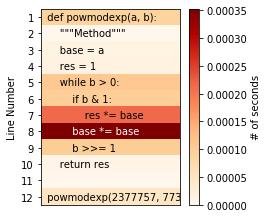

In [11]:
%%heat
def powmodexp(a, b):
    """Method"""
    base = a
    res = 1
    while b > 0:
        if b & 1: 
            res *= base
        base *= base
        b >>= 1
    return res

powmodexp(2377757, 773)